In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [29]:

t_file = pd.read_csv('PASCAL_VOC/test2.csv', sep=",")
np_file = t_file.to_numpy()
X_test, X_val = train_test_split(np_file, test_size=0.5, random_state=404)

In [39]:
X_test[0][0][0:7]

'008378.'

In [42]:
test_output = []
val_output = []
for i in range(len(X_test)):
    val = X_test[i][0][0:7]
    val = str(X_test[i][0][0:7]) + 'jpg,' + X_test[i][0]
    val2 = X_val[i][0][0:7]
    val2 = str(X_val[i][0][0:7]) + 'jpg,' + X_val[i][0]
    test_output.append(val)
    val_output.append(val2)

In [49]:
pd.DataFrame(test_output).to_csv("test_output.csv", header=False, index=False)
pd.DataFrame(val_output).to_csv("val_output.csv", header=False, index=False)

# Tid til at splitte output og lave til graf

In [3]:
output = open('model3/finaloutput.txt')
lines = output.readlines()
train_loss = []
val_loss = []
epoch = []
MAP = []
counter = 0
for i in range(38):
    MAP.append(0.0)
for line in lines:
    lin = line.strip()
    if(lin[0:15] == 'training loss: '):
        train_loss.append(float(lin[15:22]))
        continue
    if(lin[0:17] == 'validation loss: '):
        val_loss.append(float(lin[17:24]))
        counter += 1
        epoch.append(counter)
        continue
    if(lin[0:5] == 'MAP: '):
        MAP.append(float(lin[5:10]))
        MAP.append(float(lin[5:10]))
        continue


In [4]:
print(len(MAP))
print(len(val_loss))

140
140


In [5]:
import matplotlib.pyplot as plt

In [6]:
print(len(train_loss))

140


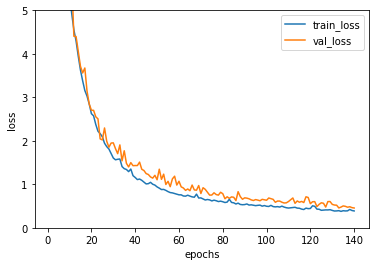

In [7]:
plt.plot(epoch, train_loss, label = 'train_loss')
plt.plot(epoch, val_loss, label = 'val_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.ylim(0,5)
plt.show()

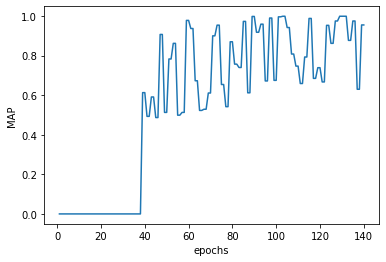

In [8]:
plt.plot(epoch, MAP, label = 'Map')
plt.ylabel('MAP')
plt.xlabel('epochs')
plt.show()

In [11]:
train_loss2= []
train_loss2.append(0)
val_loss2 = []
val_loss2.append(0)
for i in range(1, len(train_loss), 1):
    train_loss2.append(train_loss[i] - train_loss[i-1])
    val_loss2.append(val_loss[i] - val_loss[i-1])

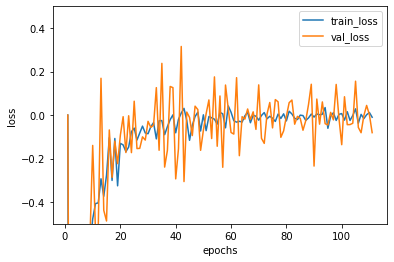

In [12]:
plt.plot(epoch, train_loss2, label = 'train_loss')
plt.plot(epoch, val_loss2, label = 'val_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.ylim(-0.5,0.5)
plt.legend()
plt.show()